# TDA  with Python using the Gudhi Library  

# Building simplicial complexes from a point cloud : Rips and Alpha complexes 

**Authors:** F. Chazal and B. Michel

In [1]:
import numpy as np
import pickle as pickle
import gudhi as gd  
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

TDA typically aims at extracting topological signatures from a point cloud in $\mathbb R^d$ or in a general metric space. [Simplicial complexes](https://en.wikipedia.org/wiki/Simplicial_complex) are used in computational geometry to infer topological signatures from a point cloud.

This tutorial explains how to build [Vietoris-Rips complexes](https://en.wikipedia.org/wiki/Vietoris%E2%80%93Rips_complex)  and [alpha complexes](https://en.wikipedia.org/wiki/Alpha_shape#Alpha_complex) from a data point in $\mathbb R ^d$.

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/VR_complex.svg/600px-VR_complex.svg.png)


The walk of 3 persons A, B and C, has been recorded using the accelerometer sensor of a smartphone in their pocket, giving rise to 3 multivariate time series in $\mathbb R ^d$: each time series represents the 3 coordinates of the acceleration of the corresponding walker in a coordinate system attached to the sensor. 

Notice that the smartphone was carried in a possibly different position for each person and thus these time series cannot be compared coordinates by coordinates.

Using a sliding window, each serie have been splitted in a list of 100 times series made of 200 consecutive points, that are stored in `data_A`, `data_B` and `data_C`.


We load the data with the pickle module :

In [2]:
f = open("./datasets/data_acc","rb")
data = pickle.load(f)    
f.close()

In [3]:
data_A = data[0]
data_B = data[1] 
data_C = data[2]
label  = data[3]
print(label)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C

The object <code>data_A</code> is a list of 100 time series of the 3d acceleration for Walker A, let's have a look at the dimensions of <code>data_A</code>:

In [4]:
print(np.shape(data_A))

(100, 200, 3)


We now represent the trajectory of accelerations for the first trajectory of walker A :

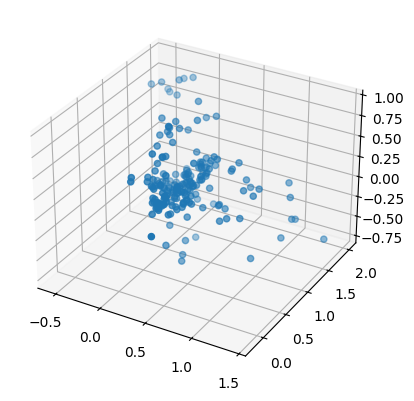

In [5]:
data_A_sample = data_A[0]
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data_A_sample[:, 0], data_A_sample[:, 1], data_A_sample[:, 2]);

### Vietoris-Rips complex


The [$\alpha$-Rips complex](https://en.wikipedia.org/wiki/Vietoris%E2%80%93Rips_complex) of a point cloud $\mathbb X$ in $(\mathbb R^d,\| \|_2)$  is an [abstract simplicial complex](https://en.wikipedia.org/wiki/Abstract_simplicial_complex) that can be defined  by forming a simplex for every finite subset of $\mathbb X$ that has diameter at most $\alpha$. 

Definition of diameter here?

Vietoris-Rips complexes can be defined for any metric space from the  matrix of pairwise distances (see this [notebook](https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-simplicial-complexes-from-distance-matrix.ipynb)).

In order to efficiently compute an $\alpha$-Rips complex, one can start by building a topological graph with:

- as many vertices as there are points; and,
- as edges only pairs of points whose distance is smaller than or equal to $\alpha$.

In other words, it corresponds to the [1-skeleton](https://en.wikipedia.org/wiki/N-skeleton) of the point cloud, with upper-bounded edge length. In GUDHI, this is performed via the `RipsComplex()` function (see the [Documentation](https://gudhi.inria.fr/python/latest/rips_complex_user.html) for details on the syntax):

In [6]:
skeleton = gd.RipsComplex(points = data_A_sample, max_edge_length = 0.2)

The `max_edge_length` parameter is the maximal diameter: only edges of length smaller than or equal to this value are included in the 1-skeleton.

From the $\alpha$-*truncated* 1-skeleton, it is then possible to add higher dimensional simplices to the simplicial complex, subject to the condition that all their faces are already in the complex. Their filtration value is then defined as the maximum filtration value of its faces which matches their diameter by design. This process necessarily yields the desired $\alpha$-Rips complex since filtration values can never exceeds $\alpha$ in this way. 

In practice, one should define a maximal dimension of simplicies to be added to the Rips complex for computational reasons. In GUDHI, this is achieved through the `create_simplex_tree()` method of the `RipsComplex` class which takes the argument `max_dimension` to limit the tree:

In [7]:
Rips_simplex_tree_sample = skeleton.create_simplex_tree(max_dimension = 3) 

The `max_dimension` parameter is the maximum dimension of the simplices included in the filtration. The result is a simplex tree, of dimension 3 in this example:

In [8]:
Rips_simplex_tree_sample.dimension()

3

We can use the methods of the simplex tree object to describe the Rips filtration. For instance, we can check that the 200 points of `data_A_sample` are all vertices of the Rips filtration:

In [9]:
Rips_simplex_tree_sample.num_vertices()

200

The number of simplices in the Rips complex is:

In [10]:
Rips_simplex_tree_sample.num_simplices()

27851

Note that this is actually the number of simplices in the "last" Rips complex of the filtration, namely with parameter $\alpha=$ `max_edge_length=`0.2. 

Notice that the number of simplices in a Rips complex increases very fast with the number of points and the dimension. AND THE $\alpha$ ??

Now let's compute the list of simplices in the Rips complex with the `get_filtration() ` function:

In [11]:
rips_generator = Rips_simplex_tree_sample.get_filtration()

Let's print the 300 first elements in the list:

In [12]:
rips_list = list(rips_generator)
for splx in rips_list[0:300] :
    print(splx)

([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([5], 0.0)
([6], 0.0)
([7], 0.0)
([8], 0.0)
([9], 0.0)
([10], 0.0)
([11], 0.0)
([12], 0.0)
([13], 0.0)
([14], 0.0)
([15], 0.0)
([16], 0.0)
([17], 0.0)
([18], 0.0)
([19], 0.0)
([20], 0.0)
([21], 0.0)
([22], 0.0)
([23], 0.0)
([24], 0.0)
([25], 0.0)
([26], 0.0)
([27], 0.0)
([28], 0.0)
([29], 0.0)
([30], 0.0)
([31], 0.0)
([32], 0.0)
([33], 0.0)
([34], 0.0)
([35], 0.0)
([36], 0.0)
([37], 0.0)
([38], 0.0)
([39], 0.0)
([40], 0.0)
([41], 0.0)
([42], 0.0)
([43], 0.0)
([44], 0.0)
([45], 0.0)
([46], 0.0)
([47], 0.0)
([48], 0.0)
([49], 0.0)
([50], 0.0)
([51], 0.0)
([52], 0.0)
([53], 0.0)
([54], 0.0)
([55], 0.0)
([56], 0.0)
([57], 0.0)
([58], 0.0)
([59], 0.0)
([60], 0.0)
([61], 0.0)
([62], 0.0)
([63], 0.0)
([64], 0.0)
([65], 0.0)
([66], 0.0)
([67], 0.0)
([68], 0.0)
([69], 0.0)
([70], 0.0)
([71], 0.0)
([72], 0.0)
([73], 0.0)
([74], 0.0)
([75], 0.0)
([76], 0.0)
([77], 0.0)
([78], 0.0)
([79], 0.0)
([80], 0.0)
([81], 0.0)
([82], 0.0)
([83], 0.0)
([

The filtration value is the diameter of the simplex, which is zero for the vertices of course. The first edge in the filtration is `[6, 34]`, these two points are the two closest points in `data_A_sample`, at distance $0.0100$ of each other. If you scroll down, you will see that the first triangle is `[4, 53, 191]`, for the filtration value $0.0327$.

### Alpha complex 

The [alpha complex](https://en.wikipedia.org/wiki/Alpha_shape#Alpha_complex) is a simplicial complex built from the finite cells of a [Delaunay triangulation](https://en.wikipedia.org/wiki/Delaunay_triangulation). Alpha complexes contain less simplices than Rips complexes and so they can be a better option. They are sub-complexes of the Delaunay complex and, as such, they are geometric simpicial complexes.

The `AlphaComplex()` function directly computes the simplex tree representing the alpha complex:

In [13]:
alpha_complex = gd.AlphaComplex(points = data_A_sample)

In [14]:
st_alpha = alpha_complex.create_simplex_tree(max_alpha_square = 0.2**2)

Talk about `max_alpha_square` ?

Talk about `default_filtration_value` ?

The point cloud `data_A_sample` belongs to $\mathbb R^3$ and so does the Alpha Complex:

In [15]:
st_alpha.dimension()

3

As for the Rips complex, the 200 points of `data_A_sample` are all vertices of the Alpha complex :

In [16]:
st_alpha.num_vertices()

200

Note that the number of simplices in the Alpha complex is smaller than for the Rips complex:

In [17]:
st_alpha.num_simplices()

3334